In [18]:
from sklearn.model_selection import train_test_split
#from sklearn.ensemble import RandomForestClassifier
from sklearn_pandas import DataFrameMapper, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.multiclass import OneVsRestClassifier
#Evaluation
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, fbeta_score
import time
import seaborn as sns

In [20]:
dataFrame_7 = pd.read_csv("data/xyscalled/scaled7.csv")
df_7 = dataFrame_7
# dataFrame_all = pd.read_csv("data/xyscalled/scaledAll.csv")
# df_all = dataFrame_all

In [ ]:
def train_report(classifier,X,y):
    classifier.fit(X, y)
    print("accuracy:",classifier.score(X,y)) # classification accuracy

    # Plot the decision boundary
    plot_decision_boundary(lambda x: classifier.predict(x),X,y)
    plt.show()


In [88]:
df_7[['retweet_count', 'followers_count', 'tweet_age']][:7078].describe()

,retweet_count,followers_count,tweet_age
count,7078.000000,7078.000000,7078.000000
mean,0.003628,0.103166,0.503239
std,0.021823,0.118241,0.296960
min,0.000000,0.014421,0.000000
25%,0.000266,0.025461,0.228916
50%,0.000639,0.047582,0.506024
75%,0.001726,0.136085,0.759036
max,1.000000,1.000000,1.000000


In [84]:
df_7[['retweet_count', 'followers_count', 'tweet_age']][].describe()

,retweet_count,is_quote_status,followers_count,friends_count,listed_count,favourites_count,statuses_count,tweet_age,sentiment,text_length,hashtags_count,usermention_count,urls_count,emojis_count,activated_duration,dow,is_weekend
count,8848.000000,8848.000000,8848.000000,8848.000000,8848.000000,8848.000000,8848.000000,8848.000000,8848.000000,8848.000000,8848.000000,8848.000000,8848.000000,8848.000000,8848.000000,8848.000000,8848.000000
mean,0.003127,0.022378,0.084163,0.040210,0.296826,0.092152,0.554708,0.517776,0.094520,0.519766,0.021157,0.086234,0.715416,0.004112,0.842582,0.469390,0.225023
std,0.020208,0.147918,0.112388,0.090349,0.213872,0.141369,0.293479,0.299088,0.269884,0.190158,0.073689,0.128063,0.451242,0.018930,0.189323,0.320466,0.417621
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000182,0.000000,0.014421,0.001370,0.133050,0.000743,0.350381,0.234940,0.000000,0.388889,0.000000,0.000000,0.000000,0.000000,0.666667,0.166667,0.000000
50%,0.000494,0.000000,0.028468,0.002878,0.253715,0.022658,0.551709,0.554217,0.000000,0.547619,0.000000,0.000000,1.000000,0.000000,1.000000,0.500000,0.000000
75%,0.001429,0.000000,0.068448,0.006629,0.382731,0.212911,0.827168,0.771084,0.200000,0.666667,0.000000,0.166667,1.000000,0.000000,1.000000,0.666667,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [78]:
df_7.keys()

Index(['text', 'retweet_count', 'is_quote_status', 'user_name',
       'followers_count', 'friends_count', 'listed_count', 'favourites_count',
       'statuses_count', 'tweet_age', 'sentiment', 'text_length',
       'hashtags_count', 'usermention_count', 'urls_count', 'emojis_count',
       'activated_duration', 'dow', 'is_weekend'],
      dtype='object')

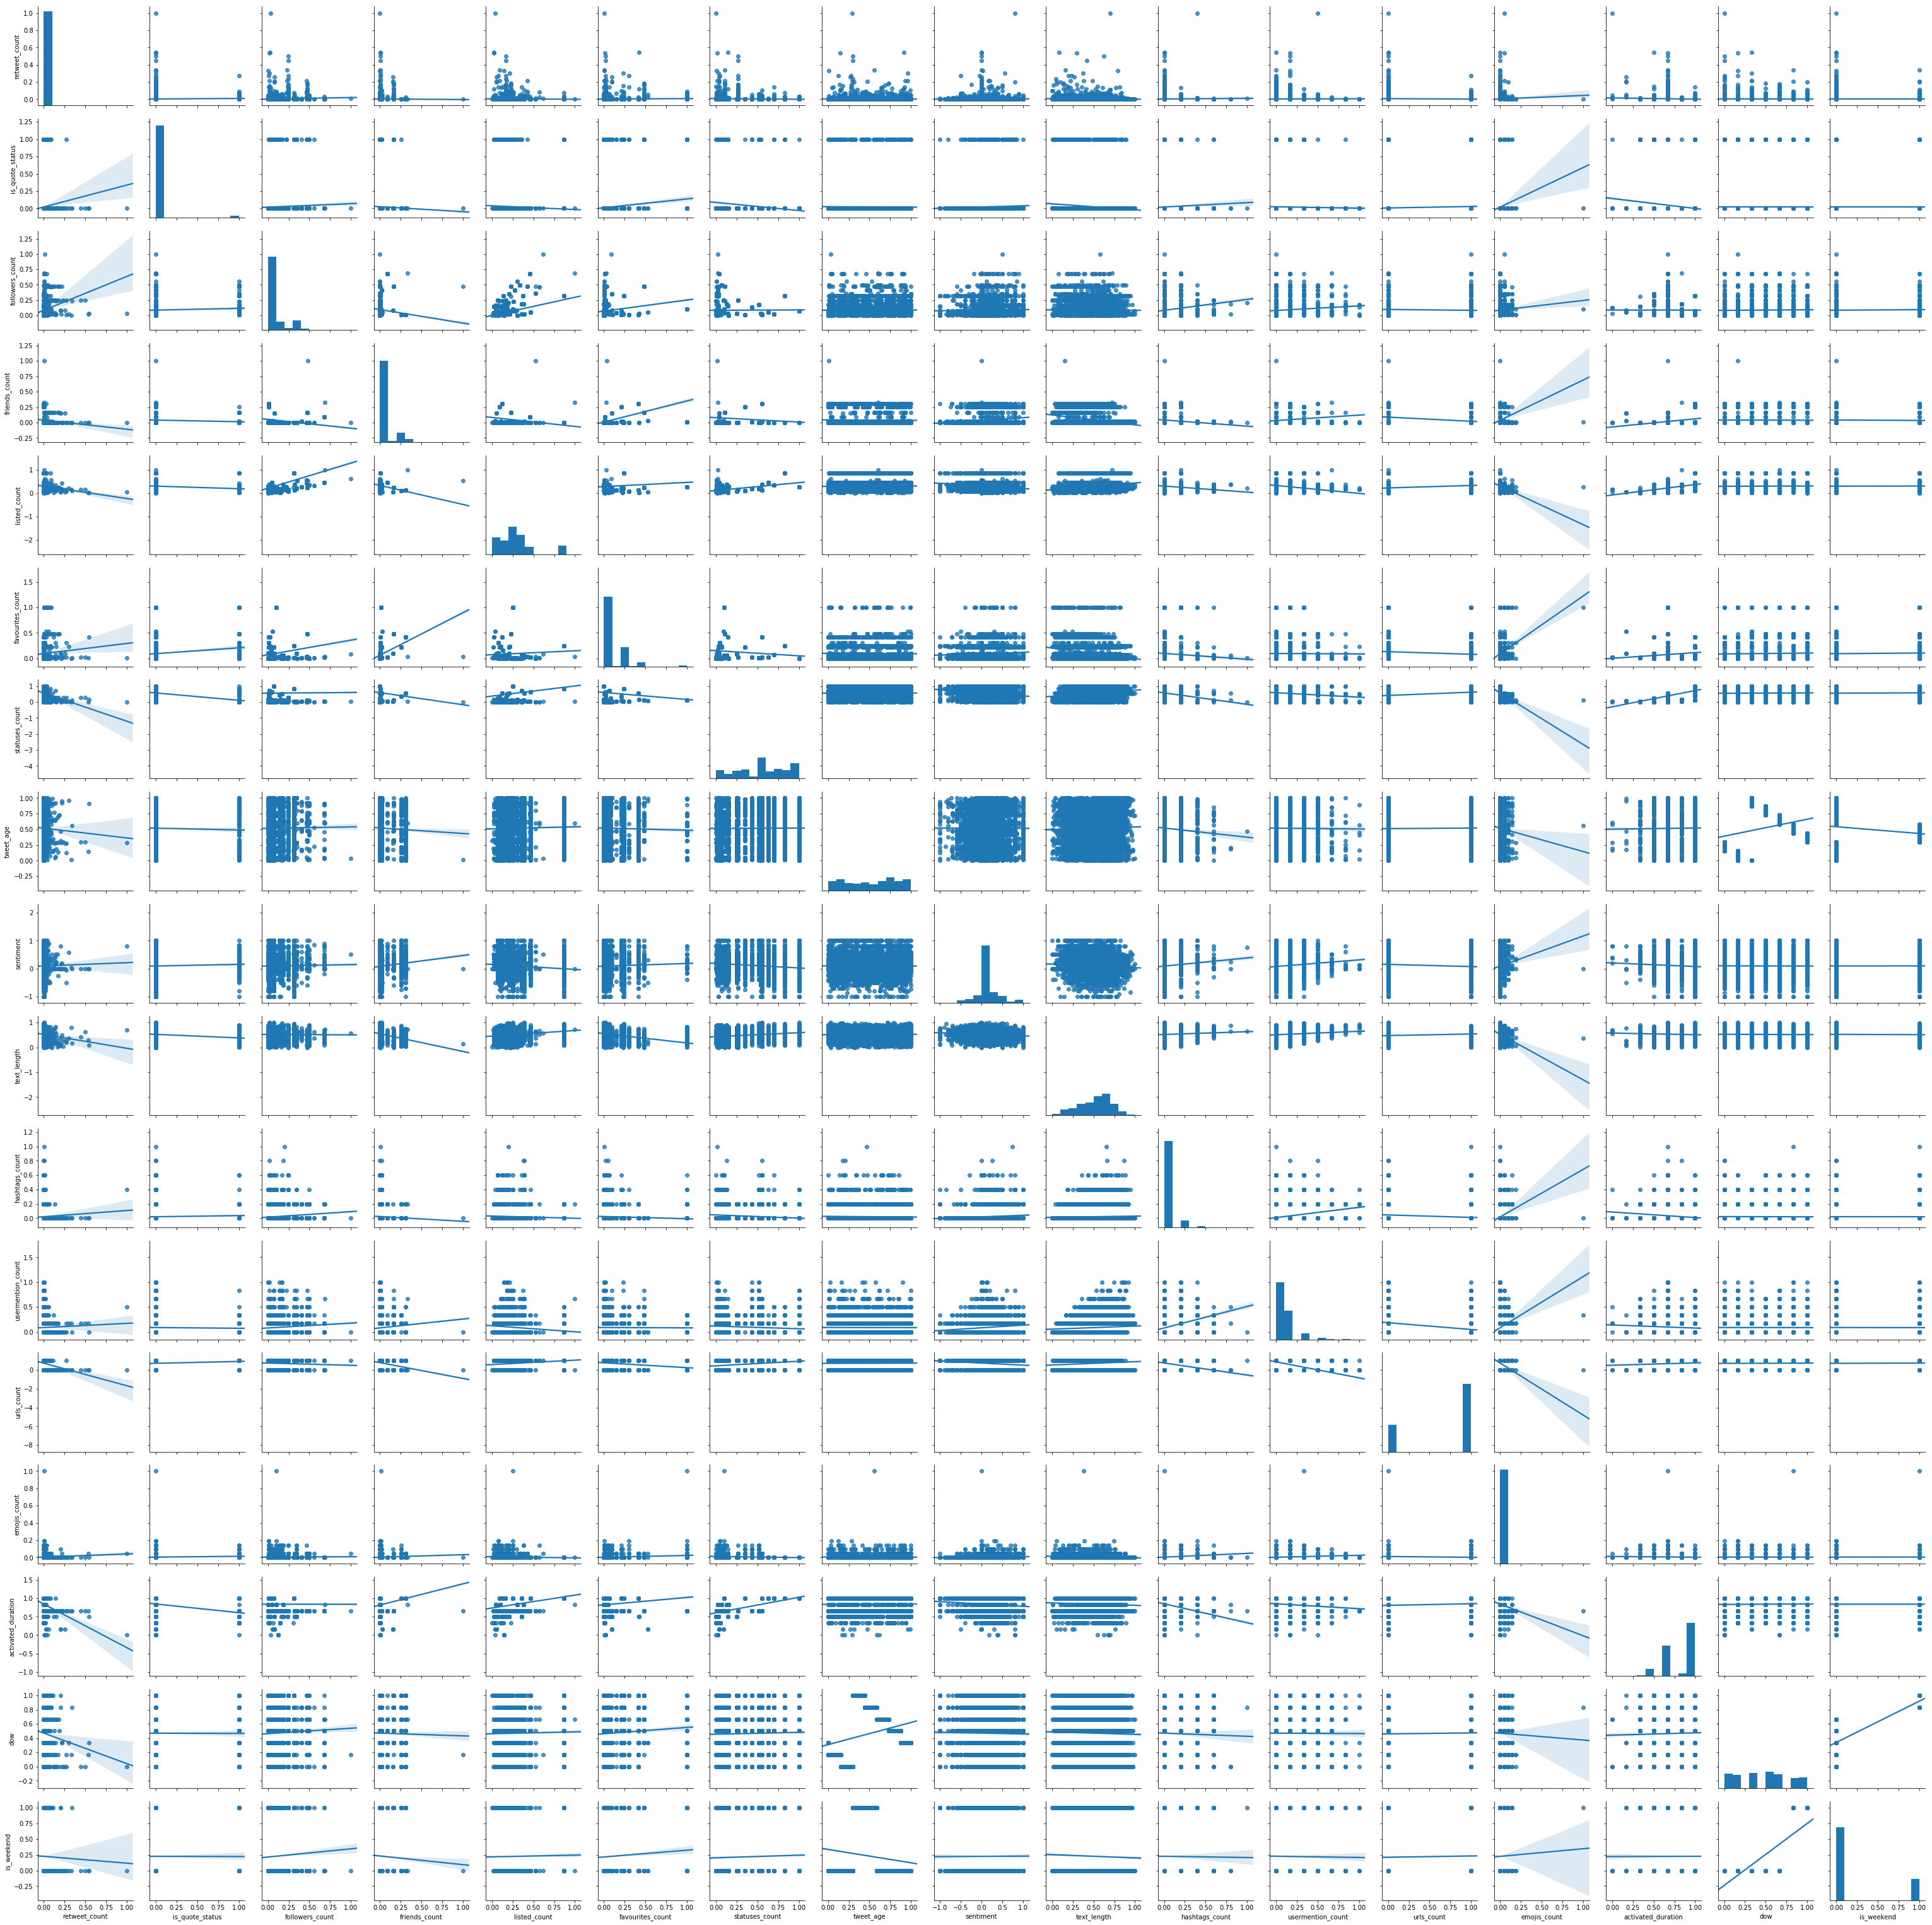

In [73]:
sns.pairplot(df_7, kind='reg')

In [64]:
df_7.head()

,text,retweet_count,is_quote_status,user_name,followers_count,friends_count,listed_count,favourites_count,statuses_count,tweet_age,sentiment,text_length,hashtags_count,usermention_count,urls_count,emojis_count,activated_duration,dow,is_weekend
0,touched carters story able pls help w chance d...,0.010500,0,katyperry,1.000000,0.000557,0.613942,0.087127,0.020573,0.030120,0.50,0.579365,0.0,0.000000,1.0,0.047619,0.666667,0.166667,0.0
1,rt thwofd cynthia germanotta momgerm explains ...,0.004182,0,ladygaga,0.687995,0.328988,1.000000,0.026850,0.019410,0.602410,0.00,0.722222,0.2,0.666667,0.0,0.000000,0.833333,0.666667,0.0
2,littlebigshots thursday theres better way cele...,0.002638,0,TheEllenShow,0.679349,0.092552,0.456768,0.013376,0.040345,0.030120,0.25,0.611111,0.2,0.000000,1.0,0.000000,0.666667,0.166667,0.0
3,tuesday mood kaceymusgraves,0.000661,0,TheEllenShow,0.679349,0.092552,0.456768,0.013376,0.040345,0.036145,0.00,0.190476,0.0,0.166667,1.0,0.000000,0.666667,0.166667,0.0
4,someone watching show gonna way riches,0.000768,0,TheEllenShow,0.679349,0.092552,0.456768,0.013376,0.040345,0.042169,0.00,0.277778,0.0,0.000000,1.0,0.000000,0.666667,0.166667,0.0


In [21]:
classifiers = [
    ('LinearSVC', OneVsRestClassifier(LinearSVC(random_state=23))),
    ('Linear Regression', LinearRegression()),
    ('Ridge CV', RidgeCV()),            
]

In [23]:
#Add the features of the dataframe that you want to transform and/or combine
mapper = DataFrameMapper([
     ('text', TfidfVectorizer()),     
     ('is_quote_status', None),
     ('user_name', TfidfVectorizer()),
     ('followers_count', None),
     ('friends_count', None),
     ('listed_count', None),
     ('favourites_count', None),
     ('statuses_count', None),
     ('tweet_age', None),
     ('sentiment', None),
     ('text_length', None),
     ('hashtags_count', None),
     ('usermention_count', None),
     ('urls_count', None),
     ('emojis_count', None),
     ('activated_duration', None),
     ('dow', None),
     ('is_weekend', None),
 ])
 
"""
Use the fit_transform method to transform the old dataframe into a new one
that can be fed to the machine learning algorithm.
"""
 
#sample Usage
features = mapper.fit_transform(df_7)
target = df_7['retweet_count']
 
# Split the data between train and test
x, x_test, y, y_test = train_test_split(features, target, test_size=0.2, train_size=0.8, random_state = 0)

In [24]:
x_test.shape

(1770, 16930)

In [13]:
len(df_all.text)

266115

In [26]:
regr = LinearRegression()
regr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [ ]:
# The mean squared error
print("Mean squared error: %.2f" % np.mean((d_y_pred) - y_test) ** 2)
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x_test, Y_test))

In [46]:
len(x_test)

1770

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [ ]:
# prediction regr

prediction = regr.predict(x_test)

In [74]:
fig = plt.figure(figsize=(12,6))
sns.heatmap(regr.corr(), annot=True)

AttributeError: 'LinearRegression' object has no attribute 'corr'

<Figure size 864x432 with 0 Axes>

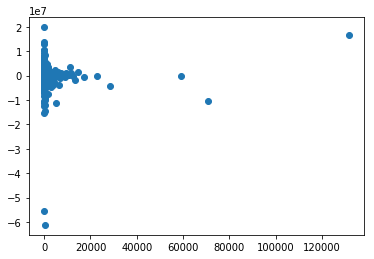

In [31]:
plt.scatter(y_test, prediction)
plt.show()

In [71]:
# clf = LinearRegression()
# clf.fit(x_train,y_train)
from sklearn.metrics import r2_score, mean_squared_error
x_train = x
y_train = y
x_dev = x_test
y_dev = y_test
print('Training score: {:0.3f}'.format(r2_score(y_train,regr.predict(x_train))))
print('Training MSE: {:0.3f}'.format(mean_squared_error(y_train,regr.predict(x_train))))
print('Dev set score: {:0.3f}'.format(r2_score(y_dev,regr.predict(x_dev))))
print('Dev set MSE: {:0.3f}'.format(mean_squared_error(y_dev,regr.predict(x_dev))))
print('Coefficients: {}\n Intercept: {}'.format(regr.coef_,regr.intercept_))

Training score: 0.946
Training MSE: 0.000
Dev set score: -58941099374103536599040.000
Dev set MSE: 56608235904890388480.000
Coefficients: [ 4.91390011e+10  1.37011513e+09 -4.12605459e+09 ...  1.33356429e+09
 -8.75473022e-04  7.62939453e-05]
 Intercept: -436548644.5576257


In [17]:
sns.distplot((y_test-prediction), bins=50)

NameError: name 'prediction' is not defined

In [16]:
print(regr.intercept_)
print(len(regr.coef_))
#print(regr.rsquared)
print(regr.score(x,y))

NameError: name 'regr' is not defined

In [52]:
prediction[:5]

array([-2776005.78847638,  1873745.01372582,  -197462.17529072,
        -361751.50982724, -1281383.24931664])

In [58]:
y_test[:5]

4475    514
6785     18
8696    442
253     564
5901     59
Name: retweet_count, dtype: int64

In [60]:
print("MAE:", metrics.mean_absolute_error(y_test, prediction))
print("MSE:", metrics.mean_squared_error(y_test, prediction))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, prediction)))

#print confidence intervals for the model coefficients

MAE: 1074960.0795643197
MSE: 7398142704104.868
RMSE: 2719952.7025492317


In [ ]:
cls_dict = {}
for clf_name, classifier in classifiers:
    t0 = time.time()
    y_pred = classifier.fit(x, y)
    cls_dict.update({clf_name: y_pred})
    t1 = time.time()
    train_time=t1 - t0

In [11]:
clf = RandomForestClassifier(random_state=0)
clf.fit(x, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [12]:
predicted = clf.predict(x_test)

In [27]:
import seaborn as sns
import scipy as sp
import xgboost as xgb

In [28]:
model_xgb = xgb.XGBRegressor(max_depth=4, learning_rate=0.01, n_estimators=596)
model_xgb.fit(x, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=596,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [39]:
def train_report(classifier,X,y,x):
    classifier.fit(X, y)
    print("accuracy:",classifier.score(X,y)) # classification accuracy

    # Plot the decision boundary
    plot_decision_boundary(lambda x: classifier.predict(x),X,y)
    plt.show()

In [37]:
train_report(model_xgb, x_test, y_test)

accuracy: 0.9690656482631527


NameError: name 'plot_decision_boundary' is not defined

In [ ]:
train_report(model_xgb, x, y, x_test)

In [30]:
y_pred = model_xgb.predict(x_test)
RMSE = metrics.mean_squared_error(y_test, y_pred)**0.5
print(RMSE)

0.02875124726854459


In [32]:
import numpy as np
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#print confidence intervals for the model coefficients

MAE: 0.004833017040954034
MSE: 0.0008266342194969928
RMSE: 0.02875124726854459


In [33]:
model_xgb.score(x_test, y_test)

0.1392996284274316

Text(0.5,1,'Actual vs Predicted XGBRegressor')

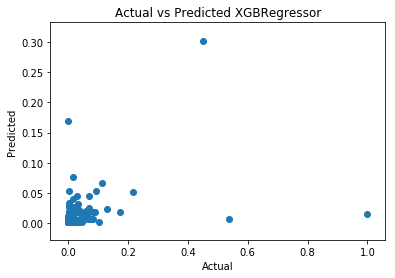

In [35]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted XGBRegressor")

In [ ]:
import matplotlib.pyplot as plt
# plot it as in the example at http://scikit-learn.org/
plt.scatter(y_test, y_pred,  color='black')
plt.plot(y_test, y_pred, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()